### - Sobhan Moradian Daghigh
#### - 7/9/2022
### - DIP - HW05 - Q2

In [2]:
import numpy as np
import glob
import cv2
from matplotlib import pyplot as plt

In [3]:
def load_datas(folder_name):
    images = glob.glob('{}*.png'.format(folder_name))
    datas = []
    names = []
    for image in images:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        datas.append(img)
        names.append(image.split('\\')[-1][:-4])
    return datas, names

In [4]:
images, names = load_datas('./inputs/P2/')

In [5]:
names

['biden_fall_1', 'biden_fall_2', 'biden_fall_3']

In [6]:
def plotter(images, names=None, subplots=None, gray=False):
    if subplots is None:
        plt.imshow(images, cmap='gray') if gray else plt.imshow(images)
        plt.title(names)
        plt.axis('off')
    else:
        fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(subplots[1] * 7, subplots[0] * 5))
        for i, (img, name, ax) in enumerate(zip(images, names, fig.axes)):
            ax.imshow(img, cmap='gray') if gray else ax.imshow(img)
            ax.set_title(name)
            ax.axis('off')
    plt.show()

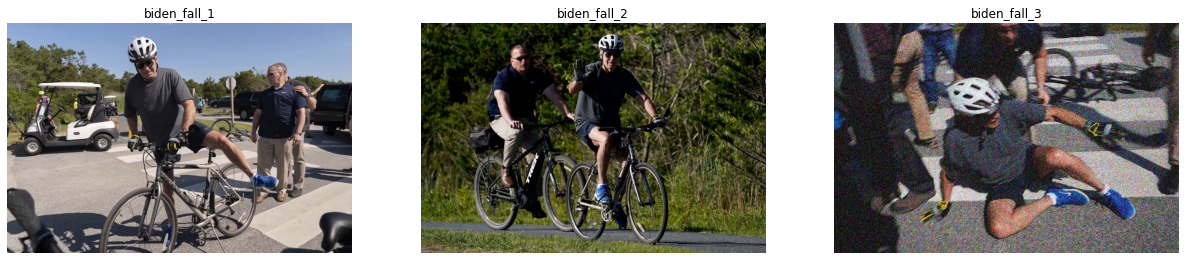

In [9]:
plotter(images, names, subplots=(1, 3))

### Part A.

In [132]:
kernel = np.ones((5, 5), np.uint8)
img = images[0]

In [145]:
def avg(img1, img2):
    return cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

def second_derivative(img1, img2):
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    
    sub = np.subtract(img1, img2)
    
    minimum = sub.min()
    maximum = sub.max()
    
    return (np.divide(np.subtract(sub, minimum), (maximum - minimum)) * 255).astype(np.uint8)

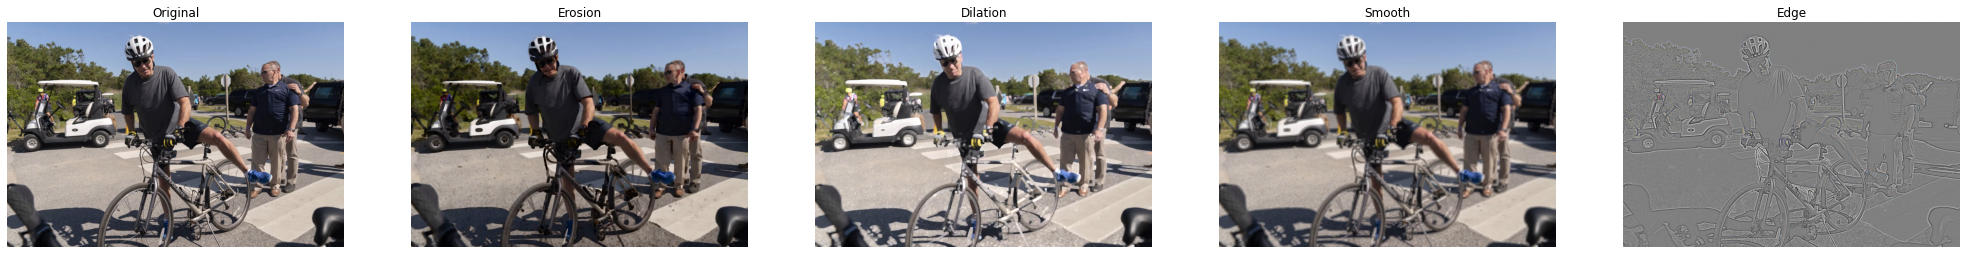

In [146]:
erosion  = cv2.erode(img, kernel)
dilation = cv2.dilate(img, kernel)

smooth = avg(erosion, dilation)
edge_erdil = second_derivative(img, smooth)

plotter([img, erosion, dilation, smooth, edge_erdil], ['Original', 'Erosion', 'Dilation', 'Smooth', 'Edge'], subplots=(1, 5))

### Part B.


In [135]:
def opening(img, kernel): 
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

def closing(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

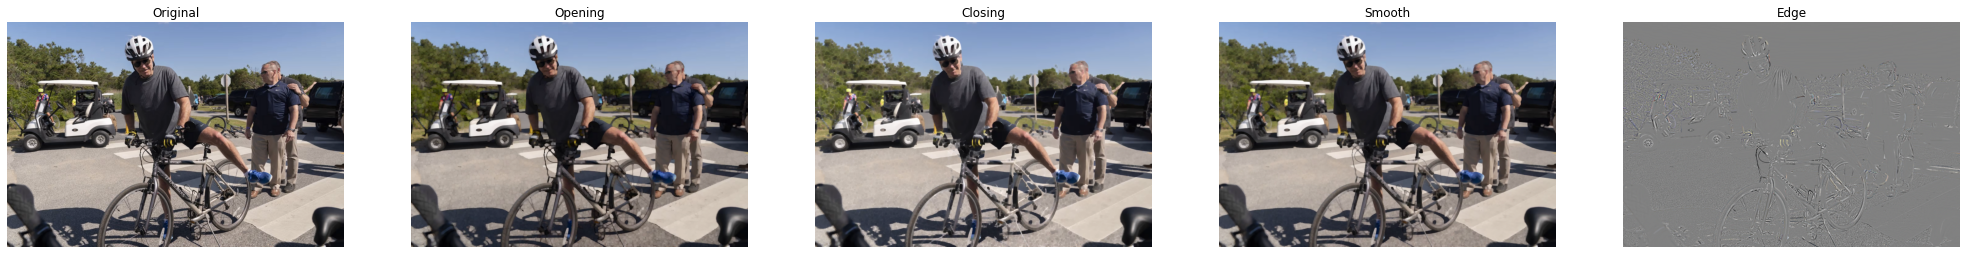

In [136]:
opening_img = opening(img, kernel)
closing_img = closing(img, kernel)

smooth = avg(opening_img, closing_img)
edge_clopen = second_derivative(img, smooth)

plotter([img, opening_img, closing_img, smooth, edge_clopen], ['Original', 'Opening', 'Closing', 'Smooth', 'Edge'], subplots=(1, 5))

### Part C.

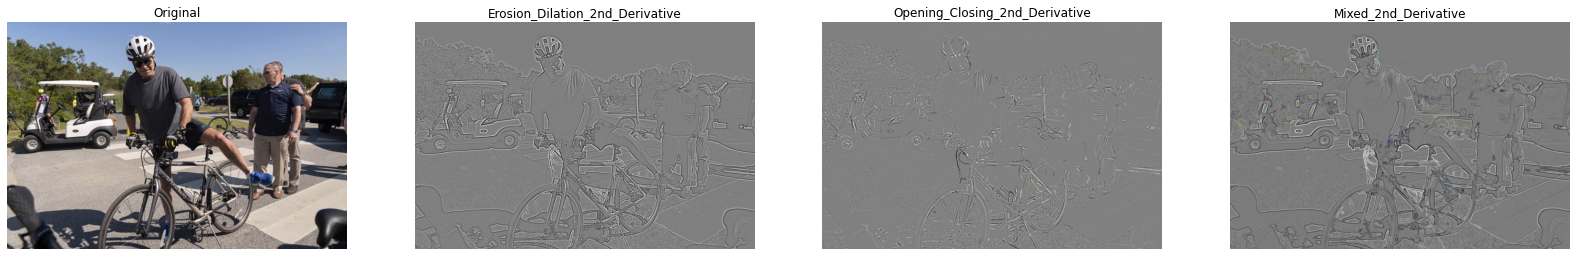

In [137]:
edge_mixed = second_derivative(edge_erdil, edge_clopen)
plotter([img, edge_erdil, edge_clopen, edge_mixed], ['Original', 'Erosion_Dilation_2nd_Derivative', 'Opening_Closing_2nd_Derivative', 'Mixed_2nd_Derivative'], subplots=(1, 4))

### Part D.

In [147]:
kernel = np.ones((5, 5), np.uint8)
img = images[1]

In [148]:
def gradient(img1, img2):
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    
    sub = np.subtract(img1, img2)
    
    minimum = sub.min()
    maximum = sub.max()
    
    return (np.divide(np.subtract(sub, minimum), (maximum - minimum)) * 255).astype(np.uint8)

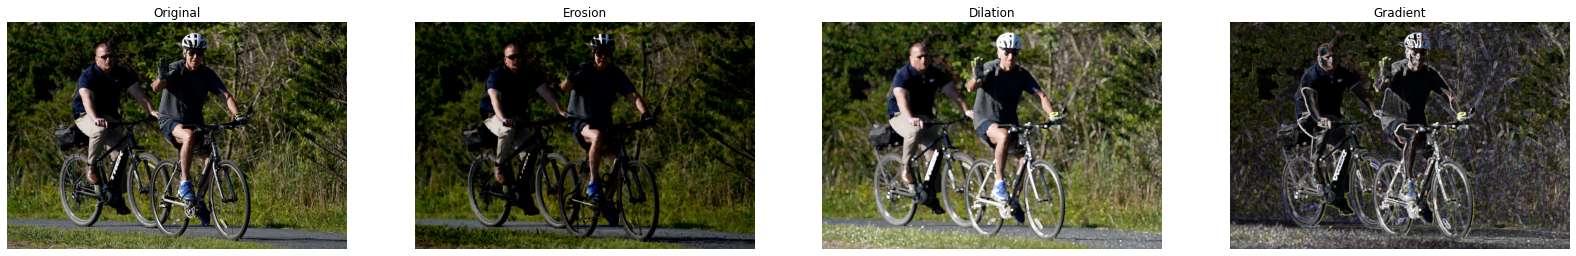

In [149]:
erosion  = cv2.erode(img, kernel)
dilation = cv2.dilate(img, kernel)

gradient_erdil = gradient(dilation, erosion)

plotter([img, erosion, dilation, gradient_erdil], ['Original', 'Erosion', 'Dilation', 'Gradient'], subplots=(1, 4))

### Part E.

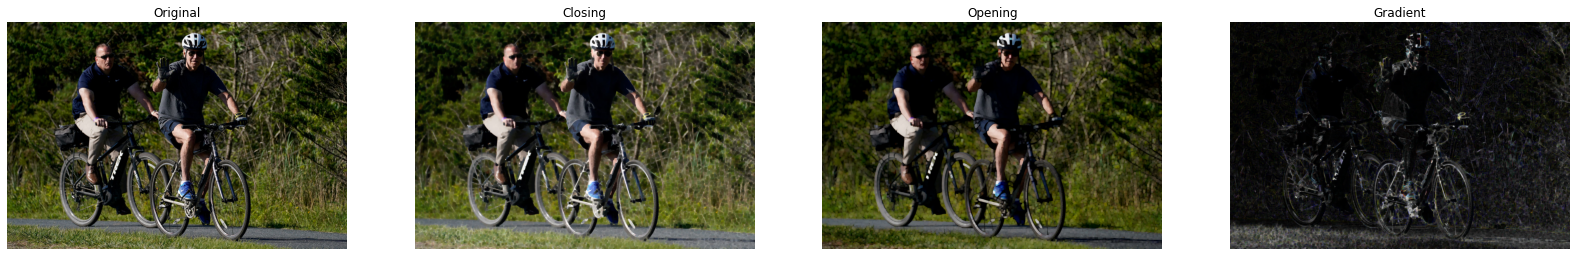

In [150]:
opening_img = opening(img, kernel)
closing_img = closing(img, kernel)

gradient_clopen = gradient(closing_img, opening_img)

plotter([img, closing_img, opening_img, gradient_clopen], ['Original', 'Closing', 'Opening', 'Gradient'], subplots=(1, 4))

### Part F.

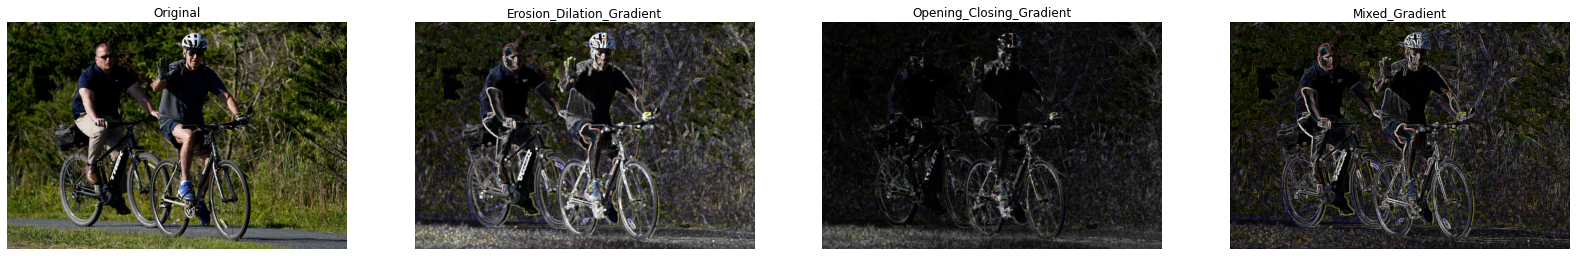

In [151]:
gradient_mixed = gradient(gradient_erdil, gradient_clopen)
plotter([img, gradient_erdil, gradient_clopen, gradient_mixed], ['Original', 'Erosion_Dilation_Gradient', 'Opening_Closing_Gradient', 'Mixed_Gradient'], subplots=(1, 4))

### Part G.

In [152]:
kernel = np.ones((5, 5), np.uint8)
img = images[2]

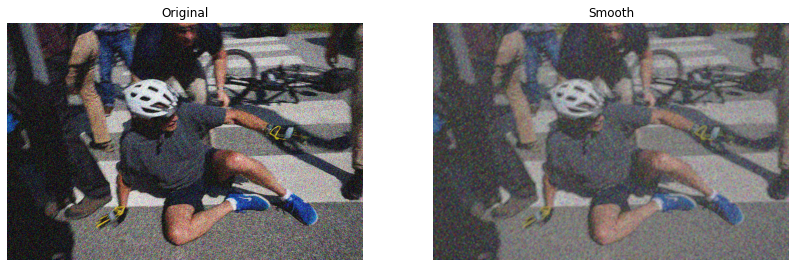

In [153]:
erosion  = cv2.erode(img, kernel)
dilation = cv2.dilate(img, kernel)

smooth = avg(dilation, erosion)

plotter([img, smooth], ['Original', 'Smooth'], subplots=(1, 2))

### Part H.

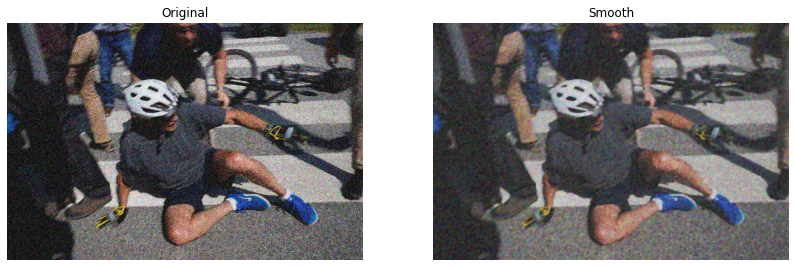

In [154]:
opening_img = opening(img, kernel)
closing_img = closing(img, kernel)

smooth = avg(opening_img, closing_img)

plotter([img, smooth], ['Original', 'Smooth'], subplots=(1, 2))

In [155]:
# Another smoothing algorithm:

In [156]:
def smoothing(img, kernel):
    opening_img = opening(img, kernel)
    return closing(opening_img, kernel)

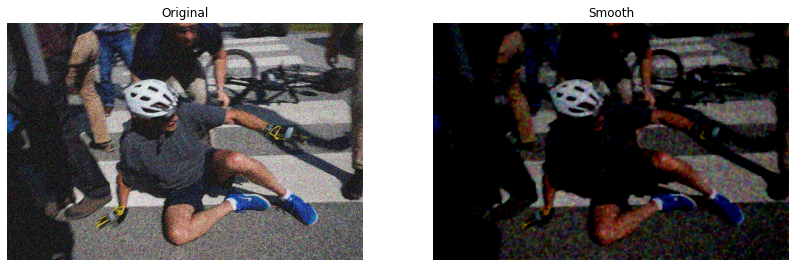

In [157]:
smooth = smoothing(img, kernel)
plotter([img, smooth], ['Original', 'Smooth'], subplots=(1, 2))